# Test code for DARWIN proyect

- Manage by Diego

## Preliminaries

**Dataset Name:** DARWIN

**Dataset Objective:** The DARWIN dataset was created with the aim of enabling researchers to enhance machine learning methodologies for the prediction of Alzheimer's disease through handwriting analysis. The primary task is to classify participants into two categories: Alzheimer's disease patients (AD) and healthy individuals (Healthy).

**Key Dataset Features:**
<!-- - Number of Participants: A total of 174 participants. -->
   - 89 Alzheimer's disease patients (AD).
   - 85 healthy individuals (Healthy).
- Structure of the "DARWIN.csv" File:
   - 452 columns in total.
   - The first column contains participant identifiers.
   - The last column indicates the class to which each participant belongs ('P' for Patient or 'H' for Healthy).
   - Intermediate columns store features extracted from 25 specific tasks, with 18 features per task.

**Missing Data:** There are no missing values in the dataset, facilitating data analysis and modeling.

**Related References:**
- [1] Paper titled "An experimental protocol to support cognitive impairment diagnosis by using handwriting analysis" in Procedia Computer Science (2018).
- [2] Paper titled "Diagnosing Alzheimer’s disease from online handwriting: A novel dataset and performance benchmarking" in Engineering Applications of Artificial Intelligence (2022).

**Para más información acerca de las covariables, el experimento realizado para obtener las mediciones y los objetivos** pensandos para el trabajo incialmente, dirigase al árticulo *Diagnosing Alzheimer’s disease from on-line handwriting A novel dataset* [2].

In [1]:
# Libraries for data handling and operations.
import pandas as pd
import numpy as np

# sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Visualization libraries.
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# URL of the CSV file
url = "https://raw.githubusercontent.com/Darkrayyss/Proyecto-Final-MAT281/55f75c4cf69c747fb155083ee56757f04078ad7c/Docs/darwin/data.csv"

# Import the CSV file into a DataFrame
df = pd.read_csv(url)

# Drop the Id
df.drop('ID', axis=1, inplace=True)

# Now, 'df' contains the data from the CSV file
df

,air_time1,disp_index1,gmrt_in_air1,gmrt_on_paper1,max_x_extension1,max_y_extension1,mean_acc_in_air1,mean_acc_on_paper1,mean_gmrt1,mean_jerk_in_air1,...,mean_jerk_in_air25,mean_jerk_on_paper25,mean_speed_in_air25,mean_speed_on_paper25,num_of_pendown25,paper_time25,pressure_mean25,pressure_var25,total_time25,class
0,5160,0.000013,120.804174,86.853334,957,6601,0.361800,0.217459,103.828754,0.051836,...,0.141434,0.024471,5.596487,3.184589,71,40120,1749.278166,296102.7676,144605,P
1,51980,0.000016,115.318238,83.448681,1694,6998,0.272513,0.144880,99.383459,0.039827,...,0.049663,0.018368,1.665973,0.950249,129,126700,1504.768272,278744.2850,298640,P
2,2600,0.000010,229.933997,172.761858,2333,5802,0.387020,0.181342,201.347928,0.064220,...,0.178194,0.017174,4.000781,2.392521,74,45480,1431.443492,144411.7055,79025,P
3,2130,0.000010,369.403342,183.193104,1756,8159,0.556879,0.164502,276.298223,0.090408,...,0.113905,0.019860,4.206746,1.613522,123,67945,1465.843329,230184.7154,181220,P
4,2310,0.000007,257.997131,111.275889,987,4732,0.266077,0.145104,184.636510,0.037528,...,0.121782,0.020872,3.319036,1.680629,92,37285,1841.702561,158290.0255,72575,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,2930,0.000010,241.736477,176.115957,1839,6439,0.253347,0.174663,208.926217,0.032691,...,0.119152,0.020909,4.508709,2.233198,96,44545,1798.923336,247448.3108,80335,H
170,2140,0.000009,274.728964,234.495802,2053,8487,0.225537,0.174920,254.612383,0.032059,...,0.174495,0.017640,4.685573,2.806888,84,37560,1725.619941,160664.6464,345835,H
171,3830,0.000008,151.536989,171.104693,1287,7352,0.165480,0.161058,161.320841,0.022705,...,0.114472,0.017194,3.493815,2.510601,88,51675,1915.573488,128727.1241,83445,H
172,1760,0.000008,289.518195,196.411138,1674,6946,0.518937,0.202613,242.964666,0.090686,...,0.114472,0.017194,3.493815,2.510601,88,51675,1915.573488,128727.1241,83445,H


Let's count the types of variables we have.

In [3]:
def inspect_dataframe(df):
    # Get a list of categorical and numeric columns
    categorical_vars = df.select_dtypes(include=['object']).columns.tolist()
    numeric_vars = df.select_dtypes(include=['int', 'float']).columns.tolist()

    # Find columns with missing values
    columns_with_missing_values = df.columns[df.isnull().any()].tolist()

    # Count the number of categorical variables, numeric variables (float and integer), and columns with missing values
    num_categorical_vars = len(categorical_vars)
    num_numeric_vars = len(numeric_vars)
    num_float_vars = len(df.select_dtypes(include=['float']).columns)
    num_integer_vars = len(df.select_dtypes(include=['int']).columns)

    # Print the information
    print("Number of categorical variables:", num_categorical_vars)
    print("Number of numeric variables (total):", num_numeric_vars)
    print("Number of numeric variables (float):", num_float_vars)
    print("Number of numeric variables (integer):", num_integer_vars)
    if len(columns_with_missing_values) == 0:
        print("No columns with missing values.")
    else:
        print("Columns with missing values:", columns_with_missing_values)

# Example of usage:
inspect_dataframe(df)

Number of categorical variables: 1
Number of numeric variables (total): 450
Number of numeric variables (float): 300
Number of numeric variables (integer): 150
No columns with missing values.


Note that in the real dataset, we had two categorical variables, one of which was the 'ID' column that was dropped. The remaining categorical variable is the target.

If we remove the first and the last column from the DataFrame, we have, in order, 18 columns representing one task, then 18 columns representing a second task, and so on, up to 25. Let's take a look at the names of the first 18 columns and the subsequent 18 columns.

In [4]:
# Create a DataFrame 'temp1' with the first 18 columns (excluding the first and last column)
temp1 = df.iloc[:, 1:-1].iloc[:, :18]

# Create a DataFrame 'temp2' with the next 18 columns
temp2 = df.iloc[:, 1:-1].iloc[:, 18:36]

# Display the names of the columns in 'temp1' with the specified format
print("Names of the first 18 columns:")
for i, column in enumerate(temp1.columns, start=1):
    print(f"- {i}: {column}")

# Display the names of the columns in 'temp2' with the specified format
print("Names of the next 18 columns:")
for i, column in enumerate(temp2.columns, start=19):
    print(f"- {i}: {column}")

Names of the first 18 columns:
- 1: disp_index1
- 2: gmrt_in_air1
- 3: gmrt_on_paper1
- 4: max_x_extension1
- 5: max_y_extension1
- 6: mean_acc_in_air1
- 7: mean_acc_on_paper1
- 8: mean_gmrt1
- 9: mean_jerk_in_air1
- 10: mean_jerk_on_paper1
- 11: mean_speed_in_air1
- 12: mean_speed_on_paper1
- 13: num_of_pendown1
- 14: paper_time1
- 15: pressure_mean1
- 16: pressure_var1
- 17: total_time1
- 18: air_time2
Names of the next 18 columns:
- 19: disp_index2
- 20: gmrt_in_air2
- 21: gmrt_on_paper2
- 22: max_x_extension2
- 23: max_y_extension2
- 24: mean_acc_in_air2
- 25: mean_acc_on_paper2
- 26: mean_gmrt2
- 27: mean_jerk_in_air2
- 28: mean_jerk_on_paper2
- 29: mean_speed_in_air2
- 30: mean_speed_on_paper2
- 31: num_of_pendown2
- 32: paper_time2
- 33: pressure_mean2
- 34: pressure_var2
- 35: total_time2
- 36: air_time3


Aquí están las traducciones y explicaciones de las covariables mencionadas:

1. **air_time1:** Tiempo en el aire 1 - Esto podría estar relacionado con la cantidad de tiempo que el participante pasa con la pluma en el aire mientras realiza una tarea de escritura a mano. Podría indicar la fluidez o la pausa en el proceso de escritura.

2. **disp_index1:** Índice de dispersión 1 - Este índice podría medir qué tan dispersos están los trazos o las letras en la escritura. Un índice alto podría indicar escritura desordenada.

3. **gmrt_in_air1:** GMRT en el aire 1 - GMRT podría referirse a una medida relacionada con la presión o el movimiento de la pluma en el aire. Podría estar relacionado con la consistencia de la escritura.

4. **gmrt_on_paper1:** GMRT en el papel 1 - Al igual que el anterior, pero relacionado con el papel. Podría medir cómo se presiona la pluma en el papel durante la escritura.

5. **max_x_extension1:** Extensión máxima en la dirección X 1 - Esto podría indicar cuán extendidos están los trazos de escritura en la dirección horizontal (X). Valores más altos podrían indicar trazos más amplios.

6. **max_y_extension1:** Extensión máxima en la dirección Y 1 - Similar al anterior, pero en la dirección vertical (Y). Podría indicar la altura de los trazos de escritura.

7. **mean_acc_in_air1:** Aceleración media en el aire 1 - Esto podría medir la aceleración promedio del movimiento de la pluma en el aire durante la escritura. Podría relacionarse con la suavidad de los trazos.

8. **mean_acc_on_paper1:** Aceleración media en el papel 1 - Similar al anterior, pero relacionado con la aceleración en el papel. Podría indicar la presión ejercida al escribir.

9. **mean_gmrt1:** GMRT promedio 1 - Esto podría ser un promedio de la medida GMRT, que mencionamos anteriormente. Podría dar una idea de la consistencia en la presión o el movimiento.

10. **mean_jerk_in_air1:** Jerk medio en el aire 1 - El jerk es una medida de la aceleración. Esta característica podría relacionarse con la suavidad del movimiento de la pluma en el aire.

11. **mean_jerk_on_paper1:** Jerk medio en el papel 1 - Similar al anterior, pero relacionado con el papel. Podría medir la suavidad de la escritura en el papel.

12. **mean_speed_in_air1:** Velocidad media en el aire 1 - Esto podría ser la velocidad promedio de la pluma en el aire durante la escritura. Podría estar relacionado con la velocidad de escritura.

13. **mean_speed_on_paper1:** Velocidad media en el papel 1 - Similar al anterior, pero relacionado con la velocidad de escritura en el papel.

14. **num_of_pendown1:** Número de veces que se baja la pluma 1 - Esto podría indicar cuántas veces el participante levanta y baja la pluma durante la escritura. Podría estar relacionado con la fluidez y la pausa.

15. **paper_time1:** Tiempo en papel 1 - Este podría ser el tiempo total que la pluma está en contacto con el papel durante la escritura.

16. **pressure_mean1:** Presión media 1 - Esto podría medir la presión media ejercida en la pluma durante la escritura.

17. **pressure_var1:** Variabilidad de la presión 1 - Esta característica podría cuantificar cuán variable es la presión ejercida en la pluma durante la escritura.

18. **total_time1:** Tiempo total 1 - Esto podría ser el tiempo total que lleva realizar la tarea de escritura.

Estas covariables proporcionan una variedad de medidas relacionadas con el proceso de escritura a mano y pueden estar relacionadas con diferentes aspectos, como la fluidez, la presión, la velocidad y la suavidad de la escritura. Cada una de ellas puede ser útil para evaluar el rendimiento de la escritura o identificar características de interés en el contexto del proyecto.

## Exploratory analysis

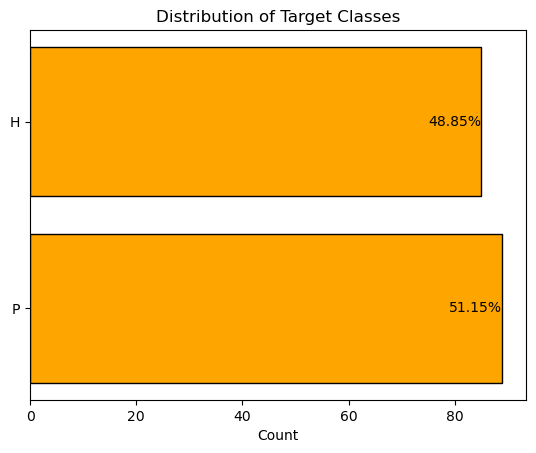

In [5]:
# Select the last row of the DataFrame
last_row = df.iloc[:, -1]

# Count the unique values in the last row (assuming it contains the target class)
unique_values = last_row.value_counts()

# Get the categories and values from the unique values
categories = unique_values.index
values = unique_values.values

# Calculate the total count
total_count = values.sum()

# Calculate the percentages
percentages = (values / total_count) * 100

# Create the horizontal histogram with specified colors, border, and percentages inside the bars
fig, ax = plt.subplots()
bars = plt.barh(categories, values, color='orange', edgecolor='black')
plt.xlabel('Count')
plt.title('Distribution of Target Classes')

# Add percentages inside the bars
for bar, percentage in zip(bars, percentages):
    ax.text(bar.get_width() - 10, bar.get_y() + bar.get_height()/2, f'{percentage:.2f}%', color='black', va='center')

plt.show()

The classes are balanced.

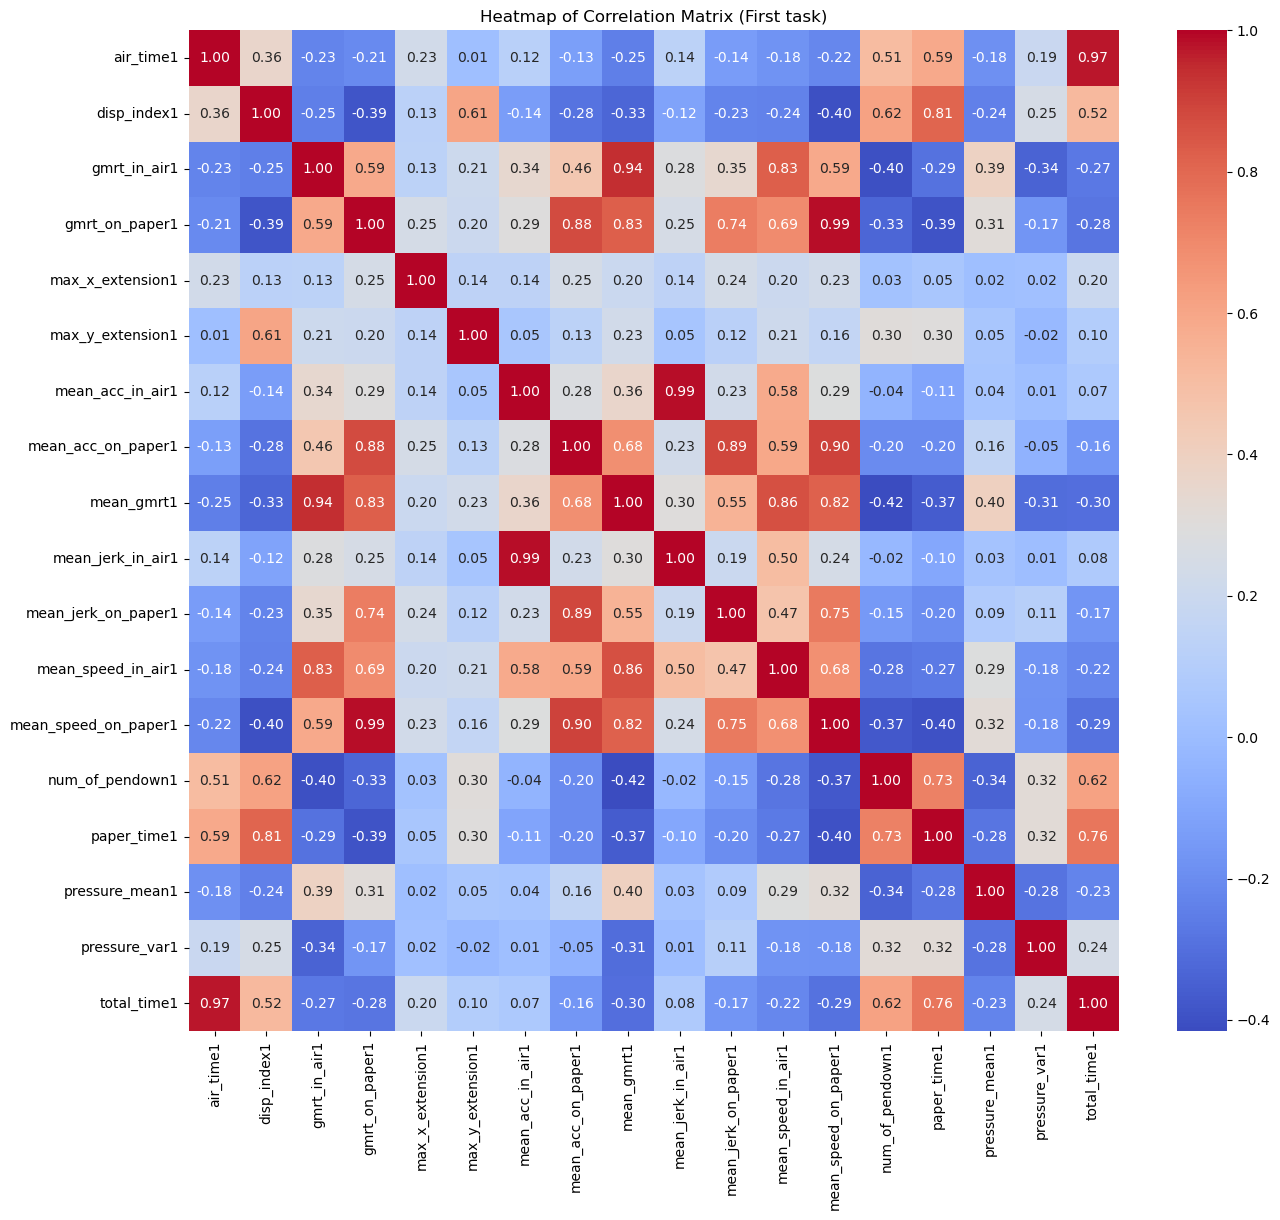

In [6]:
# Select the first 18 columns
first_18_columns = df.iloc[:, :18]

# Calculate the correlation matrix centered on those columns
correlation_matrix = first_18_columns.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(15, 13))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)

# Add a title
plt.title('Heatmap of Correlation Matrix (First task)')

# Show the heatmap
plt.show()

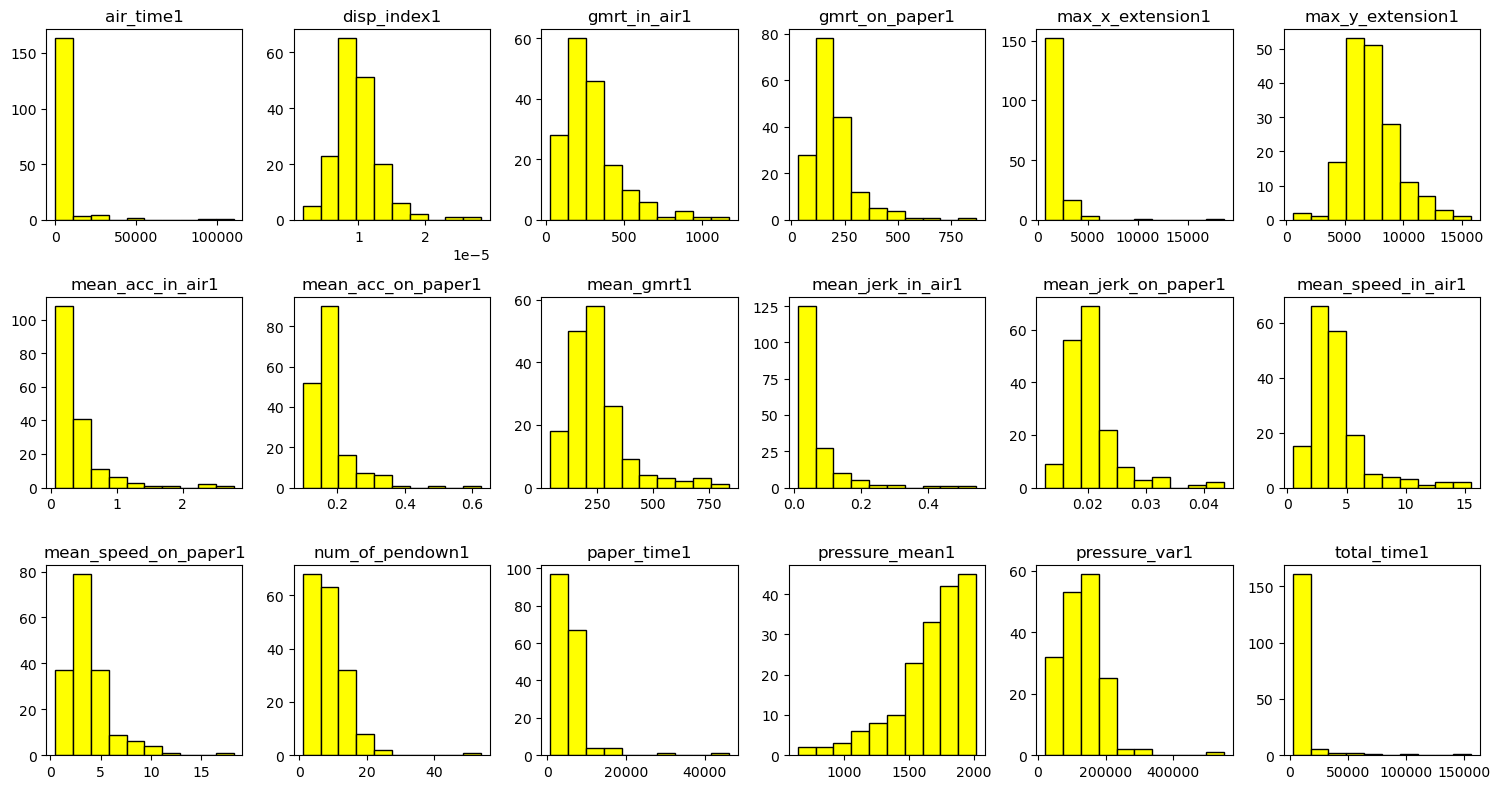

In [7]:
# Seleccionar las primeras 18 columnas
first_18_columns = df.iloc[:, :18]

# Tamaño de la figura
fig, axes = plt.subplots(3, 6, figsize=(15, 8))

# Definir colores y borde
hist_color = 'yellow'
edge_color = 'black'

# Crear histogramas para las primeras 18 columnas
for i, column in enumerate(first_18_columns.columns):
    ax = axes[i // 6, i % 6]
    ax.hist(first_18_columns[column], color=hist_color, edgecolor=edge_color)
    ax.set_title(column)
    
# Ajustar la disposición
plt.tight_layout()
plt.show()

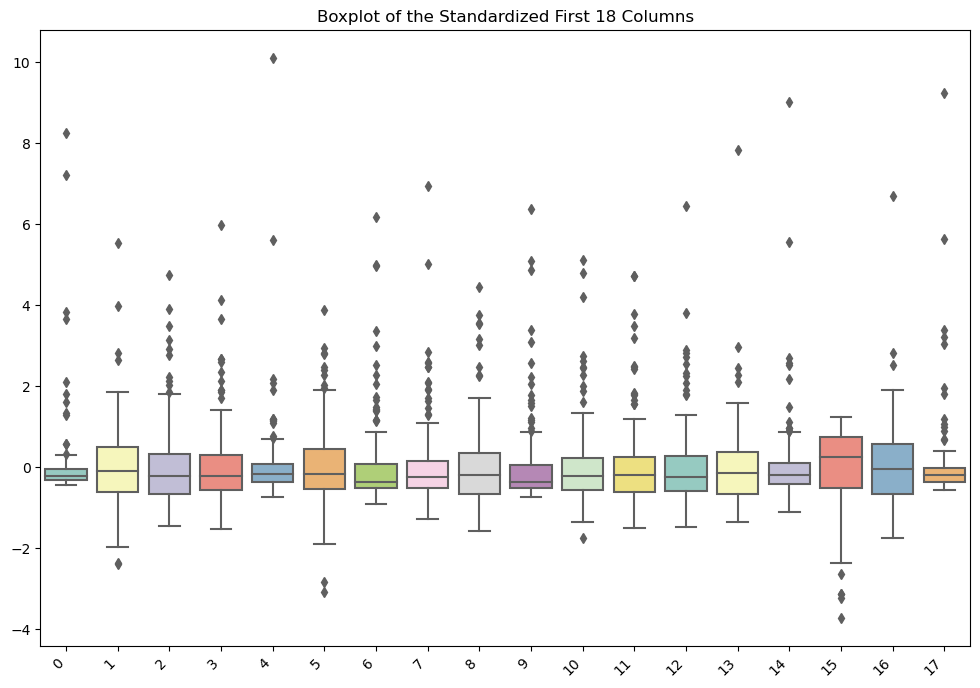

In [8]:
# Seleccionar las primeras 18 columnas
first_18_columns = df.iloc[:, :18]

# Estandarizar las columnas
scaler = StandardScaler()
standardized_columns = scaler.fit_transform(first_18_columns)

# Tamaño de la figura
plt.figure(figsize=(12, 8))

# Crear un boxplot de las columnas estandarizadas
sns.boxplot(data=standardized_columns, palette="Set3")

# Establecer etiquetas en el eje x
plt.xticks(rotation=45, ha="right")

# Agregar un título
plt.title("Boxplot of the Standardized First 18 Columns")

# Mostrar el boxplot
plt.show()

## Split train and test set

In [9]:
# Define the features (X) and the target variable (y)
X = df.drop('class', axis=1)  # Assuming 'class' is the name of the target column
y = df['class']

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=777)

# Check the dimensions of the training and test sets
print("Dimensions of X_train:", X_train.shape)
print("Dimensions of X_test:", X_test.shape)
print("Dimensions of y_train:", y_train.shape)
print("Dimensions of y_test:", y_test.shape)

Dimensions of X_train: (139, 450)
Dimensions of X_test: (35, 450)
Dimensions of y_train: (139,)
Dimensions of y_test: (35,)


In [10]:
# Initialize the StandardScaler object
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Apply the same transformation to the test data
X_test_scaled = scaler.transform(X_test)

# Now, X_train_scaled and X_test_scaled contain the standardized data

In [11]:
from sklearn.ensemble import RandomForestClassifier

# Crear un diccionario para almacenar los clasificadores por tarea
task_classifiers = {}

# Iterar sobre cada tarea
for task_number in range(1, 26):
    # Seleccionar las características correspondientes a la tarea
    features = X_train_scaled[:, (task_number - 1) * 18:task_number * 18]
    
    # Entrenar un clasificador basado en árboles (Random Forest) para esta tarea
    classifier = RandomForestClassifier(n_estimators=100, random_state=777)  # Puedes ajustar los hiperparámetros
    classifier.fit(features, y_train)
    
    # Almacenar el clasificador en el diccionario
    task_classifiers[task_number] = classifier

# Para hacer predicciones para una tarea específica (por ejemplo, tarea 1):
task_number = 1
features_test = X_test_scaled[:, (task_number - 1) * 18:task_number * 18]
predictions = task_classifiers[task_number].predict(features_test)

In [12]:
from collections import Counter

# Create an empty list to store individual predictions for each test instance
all_predictions = []

# Iterate over the test instances
for instance in X_test_scaled:
    instance_predictions = []
    
    # Iterate over each task and get predictions from the corresponding classifier
    for task_number in range(1, 26):
        features_test = instance[(task_number - 1) * 18:task_number * 18]
        task_classifier = task_classifiers[task_number]  # Get the classifier for the task
        prediction = task_classifier.predict([features_test])
        instance_predictions.append(prediction[0])
    
    # Calculate the majority class among the individual predictions
    majority_class, _ = Counter(instance_predictions).most_common(1)[0]
    
    # Assign the majority class as the final prediction for this instance
    all_predictions.append(majority_class)

# Now, 'all_predictions' contains the majority vote predictions for all test instances

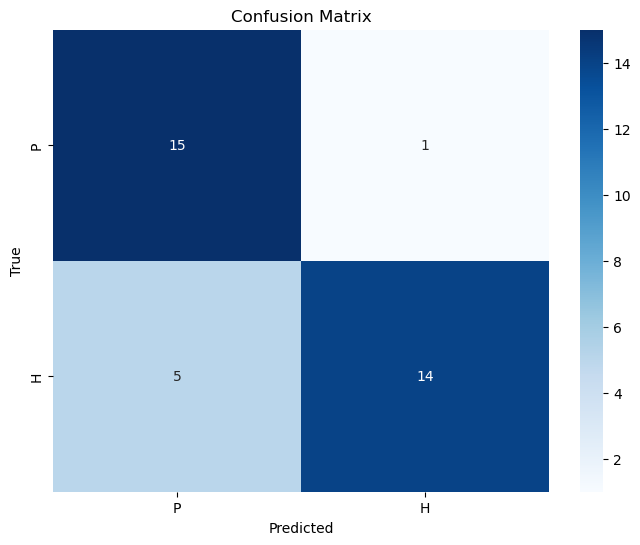

In [13]:
# Check unique class labels in the target variable
unique_labels = y.unique()

# Create a confusion matrix using the unique labels
cm = confusion_matrix(y_test, all_predictions, labels=unique_labels)

# Create a heatmap with the class labels
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=unique_labels, yticklabels=unique_labels)

# Set axis labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

<p style="text-align: center;">
    <img src="https://github.com/Darkrayyss/Proyecto-Final-MAT281/raw/307f0d0f14aefbff8de7698d0c645d680ced6994/Carpet%20for%20Test%201/images/Capy1.png" alt="Capy hide" width="800" style="border: 10px solid black;">
    <br>
    <small>Título de la imagen: Capybara hide</small>
</p>
